<a href="https://colab.research.google.com/github/JulianDR26/Se-ales-y-Sistemas-2024-1S/blob/main/detectorbasejd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Lee el archivo especificando el motor 'openpyxl' para archivos .xlsx
df = pd.read_excel('/content/drive/MyDrive/cancionesbase.xlsx', engine='openpyxl')
df
# Muestra las primeras filas del DataFrame
print(df.head())

#file_ = 'cancionesbase.xlsx'#leer archivo xlsx con link, artist, genero
#X = pd.read_excel(file_)
#X#imprimir filas iniciales

                                                link     artist   genero  \
0  https://youtu.be/e3nSvIiBNFo?si=wExyCoC_cwd2bEYt     Vivaldi  clasica   
1  https://youtu.be/6-LoRoo8OX4?si=sGH-jZJxsQKRZuOj     Vivaldi  clasica   
2  https://youtu.be/8x4GC0-Z0ZI?si=3rqaHQIsJ0WcJvpq     Vivaldi  clasica   
3  https://youtu.be/TZCfydWF48c?si=XK5J_-_lZQqbKr1Q     Vivaldi  clasica   
4  https://youtu.be/NlprozGcs80?si=c9UQlNSijXxLxEJq   Pachelbel  clasica   

   type_num  
0         1  
1         1  
2         1  
3         1  
4         1  


In [2]:
#instalar librerias necesarias para descargar audios youtube
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
!pip install soundfile

import os
import yt_dlp as youtube_dl

#funcion para descargar mp3 desde youtube
def download_ytvid_as_mp3(video_url,name):
    #video_url = input("enter url of youtube video:")
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

    print("Download complete... {}".format(filename))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 9.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached urllib3-2.2.3-py3-none-any.whl.metadata (6.5 kB)
  Using cached charset_normalizer-3.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (33 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached certifi-2024.8.30-py3-none-any.whl (167 kB)
Using cached urllib3-2.2.3-py3-none-any.whl (126 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━

In [3]:
import subprocess
import os

#crear carpeta con resultados
try:
  os.mkdir('results')
except:
  print("Carpeta results ya existe")

#recorrer excel con videos
N, P = df.shape
Ns = N * 5 #cantidad de segmentos por cancion

for n in range(N):
    print(f"video {n+1} de {N}")
    print(f"link: {df.loc[n,'link']}\n")
    print(f"band: {df.loc[n,'artist']}\n")
    print(f"type: {df.loc[n,'genero']}\n")
    #ruta video n-th
    name_ = 'results/'+df.loc[n,'artist']+"_"+str(n)+"_"+str(df.loc[n,'type_num']) # #video+nombre+tipo de genero musical
    #descargar mp3 desde youtube
    download_ytvid_as_mp3(df.loc[n,'link'],name_)
    #convertir a .wav
    subprocess.call(['ffmpeg','-y', '-i', name_+'.mp3',
                   name_+'.wav'])

video 1 de 40
link: https://youtu.be/e3nSvIiBNFo?si=wExyCoC_cwd2bEYt 

band: Vivaldi

type: clasica

[youtube] Extracting URL: https://youtu.be/e3nSvIiBNFo?si=wExyCoC_cwd2bEYt 
[youtube] e3nSvIiBNFo: Downloading webpage
[youtube] e3nSvIiBNFo: Downloading ios player API JSON
[youtube] e3nSvIiBNFo: Downloading web creator player API JSON
[youtube] e3nSvIiBNFo: Downloading player 96d06116
[youtube] e3nSvIiBNFo: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=e3nSvIiBNFo
[youtube] e3nSvIiBNFo: Downloading webpage
[youtube] e3nSvIiBNFo: Downloading ios player API JSON
[youtube] e3nSvIiBNFo: Downloading web creator player API JSON
[youtube] e3nSvIiBNFo: Downloading m3u8 information
[info] e3nSvIiBNFo: Downloading 1 format(s): 251
[download] Destination: results/Vivaldi_0_1.mp3
[download] 100% of    2.70MiB in 00:00:00 at 15.49MiB/s  
Download complete... results/Vivaldi_0_1.mp3
video 2 de 40
link: https://youtu.be/6-LoRoo8OX4?si=sGH-jZJxsQKRZuOj 

band:

In [4]:
#cargar .wavs y partir audios
#lista archivos .wav
path = 'results/'
wav_files = [f for f in os.listdir(path) if f.endswith('.wav')]
wav_files

['Hector Bonilla_22_2.wav',
 'La 33_29_2.wav',
 'Eddie Santiago_38_2.wav',
 'Grupo Niche_33_2.wav',
 'Adolescentes_23_2.wav',
 'Edvard grieg_6_1.wav',
 'Vivaldi_2_1.wav',
 'Jerry Rivera_24_2.wav',
 'Vivaldi_19_1.wav',
 'Mozart_8_1.wav',
 'Vivaldi_3_1.wav',
 'Vivaldi_18_1.wav',
 'Beethoven_13_1.wav',
 'Beethoven_5_1.wav',
 'Vivaldi_1_1.wav',
 'Ruben Blades_30_2.wav',
 'Pare Cochero_28_2.wav',
 'Adolescentes_21_2.wav',
 'Grupo Niche_27_2.wav',
 'Roberto Blades_37_2.wav',
 'Chopin_10_1.wav',
 'Willie Colon_36_2.wav',
 'Grupo Niche_34_2.wav',
 'Tchaikovsky_16_1.wav',
 'Grupo Niche_31_2.wav',
 'Eddie Santiago_39_2.wav',
 'Bach_15_1.wav',
 'Beethoven_11_1.wav',
 'Adolescentes_20_2.wav',
 'Frankie Ruiz_26_2.wav',
 'Beethoven_9_1.wav',
 'Mozart_12_1.wav',
 'Vivaldi_14_1.wav',
 'Richie Ray y Boby Cruz_32_2.wav',
 'Pachelbel_4_1.wav',
 'Eddie Santiago_25_2.wav',
 'Vivaldi_0_1.wav',
 'Tchaikovsky_7_1.wav',
 'Franz Schubert_17_1.wav',
 'Michel El Buenon_35_2.wav']

In [5]:
!pip install soundfile #instalar sondfile

In [6]:
import numpy as np
import soundfile as sf
from scipy.interpolate import interp1d

# Definir la frecuencia de muestreo y parámetros
fs = 48000  # frecuencia de muestreo original
tl = np.array([40, 50, 60, 70, 80, 90, 100])  # puntos de tiempo de lectura en segundos
ts = 5  # duración del segmento en segundos
min_muestras = 240000  # número fijo de muestras para cada segmento (5 segundos * 48000 muestras/segundo)
Ns = len(wav_files) * len(tl)  # cantidad total de segmentos

# Inicialización de arrays para almacenar los segmentos de audio y etiquetas
x_t = np.zeros((Ns, min_muestras, 2))  # Matriz de segmentos (Ns segmentos, muestras por segmento, 2 canales estéreo)
label = np.zeros((Ns, 1))  # Vector para el tipo de género
name_c = []  # Lista para almacenar los nombres de los archivos

# Función para interpolar el audio a un tamaño fijo de muestras
def interpolar_audio_a_tamaño_fijo(x, fs, target_muestras):
    t_original = np.linspace(0, len(x) / fs, num=len(x))  # Tiempo original de la señal
    t_nuevo = np.linspace(0, len(x) / fs, num=target_muestras)  # Nuevo tiempo con el número deseado de muestras

    # Interpolación de las nuevas muestras
    interpolador = interp1d(t_original, x, axis=0)
    x_interpolado = interpolador(t_nuevo)

    print(f"Interpolación realizada: Muestras originales: {len(x)}, Muestras nuevas: {len(x_interpolado)}")
    return x_interpolado

# Lectura de archivos WAV y creación de segmentos interpolados
i = 0  # índice para recorrer y almacenar los segmentos
for name in wav_files:  # Lectura de cada archivo .wav
    x, fs = sf.read(path + name)  # Leer archivo de audio

    # Interpolar el audio a un tamaño fijo de 240,000 muestras
    x = interpolar_audio_a_tamaño_fijo(x, fs, min_muestras)

    # Extraer segmentos de tiempo específicos
    for ti in tl:
        inicio = int(fs * ti)
        fin = inicio + min_muestras

        # Verificar que el segmento está dentro del rango
        if fin <= len(x):
            segmento = x[inicio:fin, :]  # Almacenar el segmento procesado
        else:
            # Si el segmento no es válido (por si hay problemas de tiempo), interpolamos todo el audio
            segmento = x[inicio:, :] if inicio < len(x) else np.zeros((min_muestras, 2))

        x_t[i] = segmento  # Almacenar el segmento
        label[i] = int(name[-5])  # Extraer el tipo de género del nombre del archivo (se asume que está en la posición -5)
        name_c += [name[:-6]]  # Almacenar el nombre del archivo sin el sufijo de tipo de género

        # Imprimir información de la lectura
        print(f"{i} lectura: {name}; segundo {ti}:{ti + ts}; tipo música {label[i]}")
        i += 1  # Incrementar el índice

# Imprimir la forma final de la matriz de segmentos
print(x_t.shape)

Interpolación realizada: Muestras originales: 8298441, Muestras nuevas: 240000
0 lectura: Hector Bonilla_22_2.wav; segundo 40:45; tipo música [2.]
1 lectura: Hector Bonilla_22_2.wav; segundo 50:55; tipo música [2.]
2 lectura: Hector Bonilla_22_2.wav; segundo 60:65; tipo música [2.]
3 lectura: Hector Bonilla_22_2.wav; segundo 70:75; tipo música [2.]
4 lectura: Hector Bonilla_22_2.wav; segundo 80:85; tipo música [2.]
5 lectura: Hector Bonilla_22_2.wav; segundo 90:95; tipo música [2.]
6 lectura: Hector Bonilla_22_2.wav; segundo 100:105; tipo música [2.]
Interpolación realizada: Muestras originales: 16269201, Muestras nuevas: 240000
7 lectura: La 33_29_2.wav; segundo 40:45; tipo música [2.]
8 lectura: La 33_29_2.wav; segundo 50:55; tipo música [2.]
9 lectura: La 33_29_2.wav; segundo 60:65; tipo música [2.]
10 lectura: La 33_29_2.wav; segundo 70:75; tipo música [2.]
11 lectura: La 33_29_2.wav; segundo 80:85; tipo música [2.]
12 lectura: La 33_29_2.wav; segundo 90:95; tipo música [2.]
13 lec

In [7]:
# Verifica la forma de x_t
print("Forma de x_t:", x_t.shape)

# Selecciona un índice para reproducir
i = 210  # Cambia este valor según sea necesario

# Verifica el contenido del segmento
print("Suma de muestras del segmento:", np.sum(x_t[i]))
print("Forma del segmento:", x_t[i].T.shape)

# Reproducción de audio
if np.sum(x_t[i]) != 0:  # Asegúrate de que el segmento no esté vacío
    Audio(x_t[i].T, rate=fs)  # Audio estéreo
else:
    print("El segmento está vacío, no se puede reproducir.")

Forma de x_t: (280, 240000, 2)
Suma de muestras del segmento: 0.0
Forma del segmento: (2, 240000)
El segmento está vacío, no se puede reproducir.


In [8]:
# Lectura de archivos WAV y creación de segmentos interpolados
i = 0  # índice para recorrer y almacenar los segmentos
for name in wav_files:  # Lectura de cada archivo .wav
    x, fs = sf.read(path + name)  # Leer archivo de audio

    print(f"Archivo: {name}, Forma: {x.shape}, Muestras: {np.sum(x)}")  # Verificación de lectura

    # Verificar que el audio tiene suficiente duración
    for ti in tl:
        inicio = int(fs * ti)
        fin = inicio + min_muestras

        if inicio < len(x):  # Asegurarse de que el índice de inicio está dentro del rango
            if fin <= len(x):
                segmento = x[inicio:fin, :]  # Almacenar el segmento procesado
            else:
                # Si fin excede, tomamos desde inicio hasta el final del audio
                segmento = x[inicio:, :] if inicio < len(x) else np.zeros((min_muestras, 2))
        else:
            # Si inicio está fuera de rango, se usa un segmento vacío
            segmento = np.zeros((min_muestras, 2))

        print(f"Segmento extraído: {segmento.shape}, Suma: {np.sum(segmento)}")  # Verificación del segmento

        # Interpolar el segmento a 240,000 muestras
        x_t[i] = interpolar_audio_a_tamaño_fijo(segmento, fs, min_muestras)
        label[i] = int(name[-5])  # Extraer el tipo de género del nombre del archivo
        name_c += [name[:-6]]  # Almacenar el nombre del archivo sin el sufijo de tipo de género

        print(f"{i} lectura: {name}; segundo {ti}:{ti + ts}; tipo música {label[i]}")
        i += 1  # Incrementar el índice

# Imprimir la forma final de la matriz de segmentos
print(x_t.shape)

Archivo: Hector Bonilla_22_2.wav, Forma: (8298441, 2), Muestras: -356.3321228027344
Segmento extraído: (240000, 2), Suma: -51.47161865234375
Interpolación realizada: Muestras originales: 240000, Muestras nuevas: 240000
0 lectura: Hector Bonilla_22_2.wav; segundo 40:45; tipo música [2.]
Segmento extraído: (240000, 2), Suma: -55.3155517578125
Interpolación realizada: Muestras originales: 240000, Muestras nuevas: 240000
1 lectura: Hector Bonilla_22_2.wav; segundo 50:55; tipo música [2.]
Segmento extraído: (240000, 2), Suma: -253.0677490234375
Interpolación realizada: Muestras originales: 240000, Muestras nuevas: 240000
2 lectura: Hector Bonilla_22_2.wav; segundo 60:65; tipo música [2.]
Segmento extraído: (240000, 2), Suma: -77.9625244140625
Interpolación realizada: Muestras originales: 240000, Muestras nuevas: 240000
3 lectura: Hector Bonilla_22_2.wav; segundo 70:75; tipo música [2.]
Segmento extraído: (240000, 2), Suma: -19.24505615234375
Interpolación realizada: Muestras originales: 240

In [9]:
from IPython.display import Audio #reproducir segmento
i = 234
Audio(x_t[i].T,rate=fs)

In [10]:
#calculo de fourier
vf = np.fft.rfftfreq(x_t.shape[1],1/fs) #calculo vector de frecuencias
Xw = np.fft.rfft(x_t,axis=1).mean(axis=-1) #transformada rapida de Fourier para señal Real a lo largo del tiempo (axis=1) y se promedian los dos canales
Xw.shape

(280, 120001)

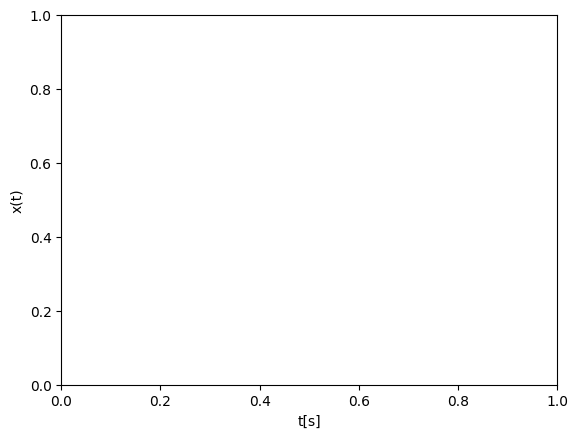

In [13]:
#grafica tiempo y fourier
plt.plot(np.arange(0,ts,1/fs),x_t.mean(axis=-1).T) #se promedian los dos canales stereo
plt.xlabel('t[s]')
plt.ylabel('x(t)')
plt.show()

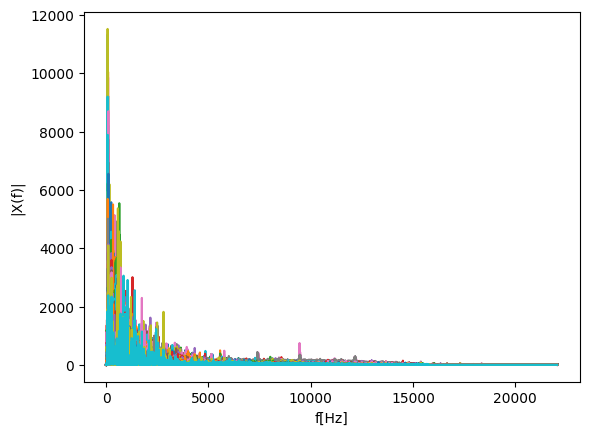

In [14]:
plt.plot(vf,abs(Xw).T)
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

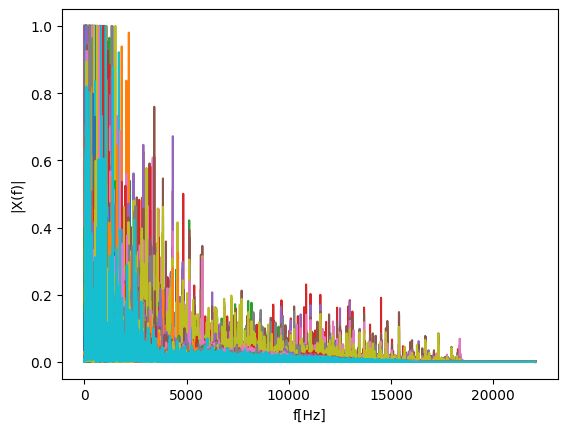

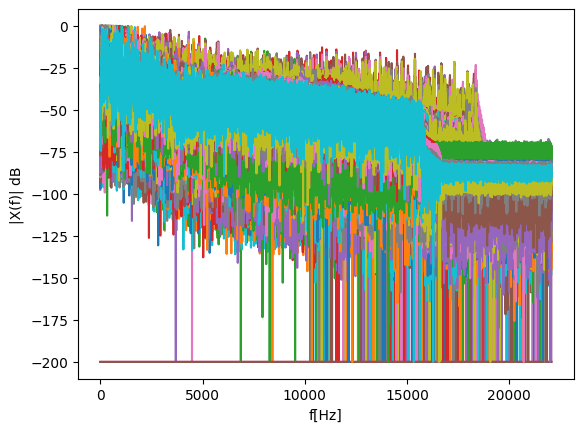

In [15]:
#se normalizan espectros entre 0 y 1 para evitar inconsistencias por ampliltudes máximas
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
Xw_ = sca.fit_transform(abs(Xw).T).T

plt.plot(vf,Xw_.T)
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

#en dB
plt.plot(vf,(20*np.log10(Xw_+1e-10)).T) # se suma 1e-10 para evitar discontinuidad del log
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)| dB')
plt.show()

In [16]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
#visualización de datos
red_ = TSNE(perplexity = 20,n_components=2,random_state=123,learning_rate='auto',init='pca')
#red_ = PCA(n_components=2,random_state=123)
fmax = 7000
X_2D = red_.fit_transform(Xw_[:,:fmax]) #se tiene en cuenta el espectro hasta fmax Hz

X_2D.shape

(280, 2)

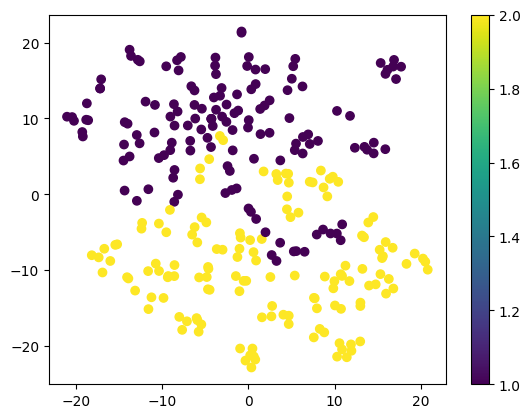

<ipython-input-17-d27fea4c4d63>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.text(X_2D[i,0]*1.025,X_2D[i,1]*1.025, tex[:-2]+"_"+str(i), fontsize=6,color=color_[int(label[i]-1)])


IndexError: index 280 is out of bounds for axis 0 with size 280

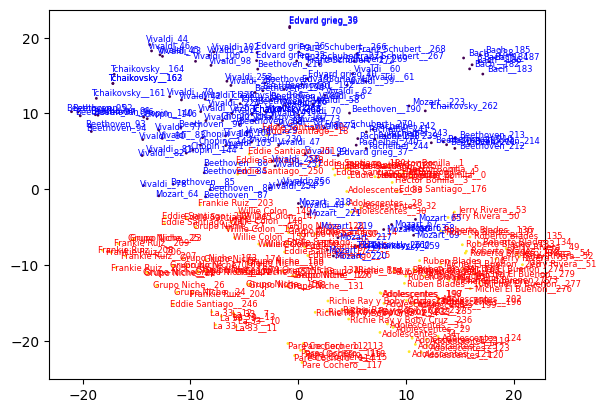

In [17]:
#graficar separabilidad 2D
plt.scatter(X_2D[:,0],X_2D[:,1],c=label)
plt.colorbar()
plt.show()

color_ = ["b","r"]
#nombre cancion
plt.scatter(X_2D[:,0],X_2D[:,1],c=label,s=1)
for i, tex in enumerate(name_c):
    #print(f"{i} {tex}")
    plt.text(X_2D[i,0]*1.025,X_2D[i,1]*1.025, tex[:-2]+"_"+str(i), fontsize=6,color=color_[int(label[i]-1)])

#plt.colorbar()
plt.show()

In [18]:
#reproducir audio
i = 96
Audio(x_t[i].T,rate=fs)

In [19]:
i = 14
Audio(x_t[i].T,rate=fs)

In [20]:
import joblib
#guardar modelo
os.mkdir('modelo')
filename_ = 'modelo/salsa_vs_clasica'
model_ ={'Xw_':Xw_,'fmax': fmax, 'label' : label, 'name_c' : name_c, 'vf':vf,'fs':fs}
joblib.dump(model_,filename_+".pkl")

['modelo/salsa_vs_clasica.pkl']

In [21]:
#descargar modelo
#guardar resultados
from google.colab import files
from datetime import date, datetime
import shutil
#guardar resultados
namefile = str(datetime.now().strftime("%Y_%m_%d_%H_%M_%d"))+'modelo'
shutil.make_archive(namefile, 'zip', 'modelo')
files.download(namefile+'.zip')

#el archivo .zip puede cargarse en drive y utilizarse en otro cuaderno para detectar género musical de nuevos segmentos

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#cargar modelo
my_model_loaded = joblib.load(filename_+".pkl")
my_model_loaded.keys()